In [1]:
import nltk
#nltk.download('all')
import spacy
nlp = spacy.load('en_core_web_lg', exclude = ["parser"])

In [108]:
sentence = "ya hello good afternoon speak to leon please good afternoon mister leon my name is jimmy and im actually calling from income may I know how can I help you today"

In [109]:
doc = nlp(sentence)

In [110]:
for token in doc:
    print(f'{token.text:{8}} {token.pos_:{6}} {token.tag_:{6}}')

ya       INTJ   UH    
hello    INTJ   UH    
good     ADJ    JJ    
afternoon NOUN   NN    
speak    VERB   VBP   
to       ADP    IN    
leon     PROPN  NNP   
please   INTJ   UH    
good     ADJ    JJ    
afternoon NOUN   NN    
mister   PROPN  NNP   
leon     PROPN  NNP   
my       DET    PRP$  
name     NOUN   NN    
is       AUX    VBZ   
jimmy    PROPN  NNP   
and      CCONJ  CC    
i        PRON   PRP   
m        VERB   VBP   
actually ADV    RB    
calling  VERB   VBG   
from     ADP    IN    
income   NOUN   NN    
may      VERB   MD    
I        PRON   PRP   
know     VERB   VBP   
how      ADV    WRB   
can      VERB   MD    
I        PRON   PRP   
help     VERB   VB    
you      PRON   PRP   
today    NOUN   NN    


In [37]:
# Convert spacy pos result to the one accpeted by nltk
pos_ls = []
for token in doc:
    pos_ls.append((token.text, token.tag_))
print(pos_ls)

[('ya', 'UH'), ('hello', 'UH'), ('good', 'JJ'), ('afternoon', 'NN'), ('speak', 'VBP'), ('to', 'IN'), ('leon', 'NNP'), ('please', 'UH'), ('afternoon', 'NN'), ('mister', 'NNP'), ('leon', 'NNP'), ('my', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('jimmy', 'NNP'), ('and', 'CC'), ('i', 'PRP'), ('m', 'VBP'), ('actually', 'RB'), ('calling', 'VBG'), ('from', 'IN'), ('income', 'NN')]


(S
  (Sentence
    ya/UH
    hello/UH
    (NP good/JJ afternoon/NN)
    (VP speak/VBP (PP to/IN (NP leon/NNP))))
  (Sentence
    please/UH
    (NP afternoon/NN mister/NNP leon/NNP my/PRP$ name/NN)
    (VP is/VBZ (NP jimmy/NNP)))
  and/CC
  (Sentence
    (NP i/PRP)
    (VP m/VBP actually/RB calling/VBG (PP from/IN (NP income/NN)))))


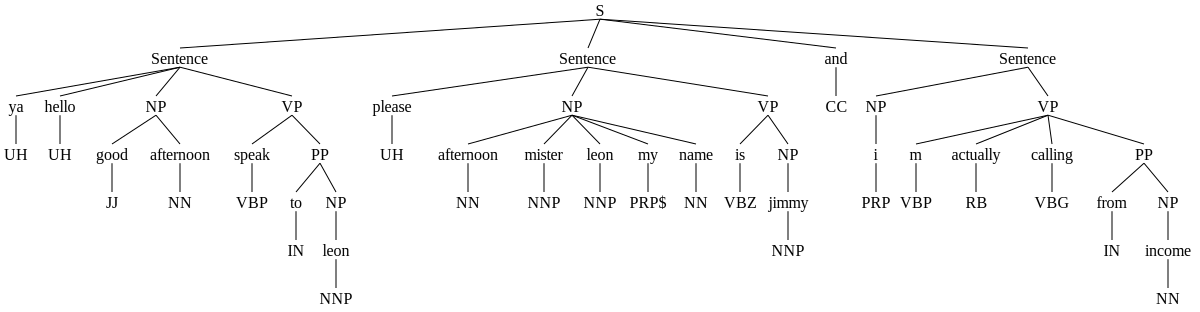

In [38]:
# grammar rules collections

# NP: noun phrases
# PP: preposition phrases
# VP: verb phrases
# 
grammar = r""" 
    NP: {<PRP.*|DT|JJ|NN.*>+}
    PP: {<IN|TO|RP><NP|VB.*>} 
    VP: {<VB.*|RB.*>+<PP|NP>*}
    Sentence: {<UH>*<NP>+<MD>*<VP|PP|NP>+}
    Question: {<WDT|DP|WRB|><MD>*<Sentence|NP|PP|VP>}
    
    
"""
chunkParser = nltk.RegexpParser(grammar)
chunked = chunkParser.parse(pos_ls)
print(chunked)
chunked

In [64]:
# Loop through the parse tree and extract useful sentences/questions
# This function can only works for Sentence/Question label
def run_traverse(t):
    new_sens = []
    def traverse(t, ls = []):
        try:
            if (t.label() == 'Sentence' or t.label() == "Question") and ls:
                new_sens.append(ls)
                ls = []
        except AttributeError:
            ls.append(t[0])
        else:
            for child in t:
                ls = traverse(child, ls)

        return ls
    ls = traverse(t)
    new_sens.append(ls)
    return new_sens

In [50]:
new_sens = run_traverse(chunked)

In [51]:
new_sens

[['ya', 'hello', 'good', 'afternoon', 'speak', 'to', 'leon'],
 ['please', 'afternoon', 'mister', 'leon', 'my', 'name', 'is', 'jimmy', 'and'],
 ['i', 'm', 'actually', 'calling', 'from', 'income']]

In [145]:
# Try to set up the function can work for any label in the level 1
def run_traverse2(t):
    new_sens = []
    level = 0
    def traverse(t, level, ls = []):
        try:
            if t.label() and level == 1 and ls:
                new_sens.append(ls)
                ls = []
        except AttributeError:
            ls.append(t[0])
        else:
            for i, child in enumerate(t):
                if i == 0:
                    level += 1
                ls = traverse(child, level, ls)
                if i == len(t)-1:
                    level -= 1
        return ls
    ls = traverse(t, level)
    new_sens.append(ls)
    return new_sens

In [146]:
new_sens2 = run_traverse2(chunked)

In [147]:
new_sens2

[['ya', 'hello', 'good', 'afternoon', 'speak', 'to', 'leon'],
 ['please', 'afternoon', 'mister', 'leon', 'my', 'name', 'is', 'jimmy', 'and'],
 ['i', 'm', 'actually', 'calling', 'from', 'income']]

In [70]:
for i, child in enumerate(chunked):
    print(i)
    print(child)

0
(Sentence
  ya/UH
  hello/UH
  (NP good/JJ afternoon/NN)
  (VP speak/VBP (PP to/IN (NP leon/NNP))))
1
(Sentence
  please/UH
  (NP afternoon/NN mister/NNP leon/NNP my/PRP$ name/NN)
  (VP is/VBZ (NP jimmy/NNP)))
2
('and', 'CC')
3
(Sentence
  (NP i/PRP)
  (VP m/VBP actually/RB calling/VBG (PP from/IN (NP income/NN))))


In [74]:
len(chunked)

4

In [90]:
level = 0
for i, child in enumerate(chunked):
    print("i",i)
    if i == 0:
        level+=1
    if i == len(chunked) - 1:
        level -= 1
    if i == 0 and child.label() == 'Sentence':
        for k, child2 in enumerate(child):
            print("k", k)
            if k == 0:
                level += 1
            if k == len(child) - 1:
                level -= 1
            print("level2", level)
            print(child2)

    print(level)
    

i 0
k 0
level2 2
('ya', 'UH')
k 1
level2 2
('hello', 'UH')
k 2
level2 2
(NP good/JJ afternoon/NN)
k 3
level2 1
(VP speak/VBP (PP to/IN (NP leon/NNP)))
1
i 1
1
i 2
1
i 3
0


In [111]:
for sentence in doc.sents:
    print(sentence)

ya hello good afternoon speak to leon please good afternoon
mister leon
my name is jimmy and im actually calling from income
may I know how can I help you today
